## Import the required libraries and dataset

**Download the dataset from [here](http://users.dimi.uniud.it/~massimo.franceschet/ns/syllabus/make/assortative/assortative.html)**

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
E = pd.read_csv(r'data/dolphins/dolphin_edges.csv', dtype=str)
V = pd.read_csv(r'data/dolphins/dolphin_nodes.csv')

In [3]:
E.head()

,x,y
0,4,9
1,6,10
2,7,10
3,1,11
4,3,11


In [4]:
V.head()

,name,sex
0,Beak,M
1,Beescratch,M
2,Bumper,M
3,CCL,F
4,Cross,M


In [5]:
for i in tqdm(range(len(E))):
    E.at[i, 'x'] = V['name'][int(E['x'][i]) - 1]
    E.at[i, 'y'] = V['name'][int(E['y'][i]) - 1]

100%|█████████████████████████████████████████████████████████████████████████████| 159/159 [00:00<00:00, 13285.81it/s]


In [6]:
E

,x,y
0,CCL,Double
1,DN16,Feather
2,DN21,Feather
3,Beak,Fish
4,Bumper,Fish
...,...,...
154,Topless,Zap
155,Ripplefluke,Zig
156,Bumper,Zipfel
157,SN4,Zipfel


In [7]:
G = nx.from_pandas_edgelist(E, source='x', target='y')

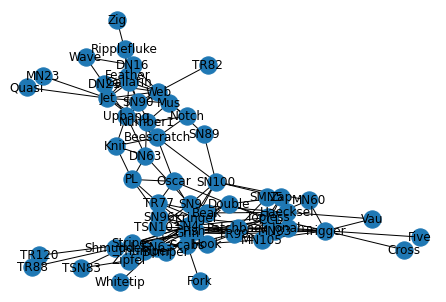

In [8]:
nx.draw(G, with_labels=True)

## Common Neighbors

In [9]:
# targets not connected directly (pair of nodes)
targets = nx.non_edges(G)
common_neighbours = [(e[0], e[1],
                     len(list(nx.common_neighbors(G, e[0], e[1]))))
                    for e in targets]
cn = sorted(common_neighbours, key=lambda x: x[2], reverse=True)
cn[:16]
# print(cn)

[('TR99', 'SN4', 4),
 ('TR99', 'SN63', 4),
 ('DN16', 'DN21', 4),
 ('MN83', 'MN105', 4),
 ('SN90', 'Jet', 4),
 ('SN90', 'DN21', 4),
 ('Upbang', 'Feather', 4),
 ('Upbang', 'Jet', 4),
 ('SN4', 'SN63', 4),
 ('Haecksel', 'Trigger', 4),
 ('Hook', 'Stripes', 4),
 ('Double', 'SN100', 3),
 ('TR99', 'MN83', 3),
 ('TR99', 'Jonah', 3),
 ('TR99', 'MN105', 3),
 ('Gallatin', 'Beescratch', 3)]

## Jaccard Coefficient

In [10]:
jaccard_coeff = list(nx.jaccard_coefficient(G))
jc = sorted(jaccard_coeff, key=lambda x: x[2], reverse=True)
jc[:16]
# print(jc)

[('Five', 'Cross', 1.0),
 ('MN23', 'Quasi', 1.0),
 ('DN16', 'DN21', 0.6666666666666666),
 ('SN90', 'DN21', 0.5714285714285714),
 ('Five', 'Vau', 0.5),
 ('DN16', 'SN90', 0.5),
 ('MN83', 'MN105', 0.5),
 ('Cross', 'Vau', 0.5),
 ('TR82', 'SN89', 0.5),
 ('Hook', 'Stripes', 0.4444444444444444),
 ('DN16', 'Ripplefluke', 0.4),
 ('SN90', 'Jet', 0.4),
 ('Upbang', 'Feather', 0.4),
 ('Beescratch', 'Mus', 0.375),
 ('Hook', 'Shmuddel', 0.375),
 ('Stripes', 'TSN103', 0.375)]

## Resource Allocation

In [11]:
RA_idx = list(nx.resource_allocation_index(G))
ra = sorted(RA_idx, key=lambda x: x[2], reverse=True)
ra[:16]
# print(ra)

[('Haecksel', 'Trigger', 0.9004329004329005),
 ('DN16', 'DN21', 0.878968253968254),
 ('Notch', 'Jet', 0.6583333333333333),
 ('Beescratch', 'Mus', 0.6444444444444444),
 ('SN100', 'Topless', 0.6242424242424243),
 ('Upbang', 'Feather', 0.6027777777777777),
 ('Beescratch', 'DN63', 0.5928571428571429),
 ('Zipfel', 'Stripes', 0.5909090909090909),
 ('Patchback', 'Grin', 0.5595238095238095),
 ('Upbang', 'Jet', 0.5277777777777777),
 ('SN90', 'DN21', 0.5218253968253967),
 ('SN90', 'Jet', 0.503968253968254),
 ('TR88', 'Stripes', 0.5),
 ('SN100', 'Web', 0.5),
 ('TR120', 'Shmuddel', 0.5),
 ('SN4', 'SN63', 0.4928571428571428)]

## Adamic-Adar Index

In [12]:
adamic_adar_idx = list(nx.adamic_adar_index(G))
ada = sorted(adamic_adar_idx, key=lambda x: x[2], reverse=True)
ada[:16]
# print(ada)

[('Haecksel', 'Trigger', 2.9317364012342075),
 ('DN16', 'DN21', 2.8926113435351204),
 ('Upbang', 'Feather', 2.1154635213872655),
 ('Notch', 'Jet', 2.012472508149437),
 ('Beescratch', 'Mus', 1.986693774499868),
 ('Upbang', 'Jet', 1.9750269337906414),
 ('SN90', 'DN21', 1.963814645015908),
 ('SN100', 'Topless', 1.9486065526106957),
 ('SN90', 'Jet', 1.930814649609145),
 ('SN4', 'SN63', 1.9087330552060944),
 ('Zipfel', 'Stripes', 1.8597274323132096),
 ('Beescratch', 'DN63', 1.8565807973738442),
 ('TR99', 'SN63', 1.8499543261497624),
 ('MN83', 'MN105', 1.8203448290106674),
 ('TR99', 'SN4', 1.8118671042605898),
 ('Patchback', 'Grin', 1.7933564893654796)]